# Deep Learning


### Neural Networks
A neural network is composed of layers, each containing neurons or units as they are called nowadays, see image. The goal in Deep Learning is to create powerful models that learn features in the input data. A neural network is a function composition of layers.


### Improve training
The training can be helped by using
* Batch normalization
* Regularization: L1, L2, Dropout (Dense, CNN layers)
* Use of the right optimizer: RMSProp, Adam or Nadam
* Right activation function: ReLu, ELU, SELU, tanh
* Hyperparameter search: Random Search, Bayesian Optimization or Hyperband

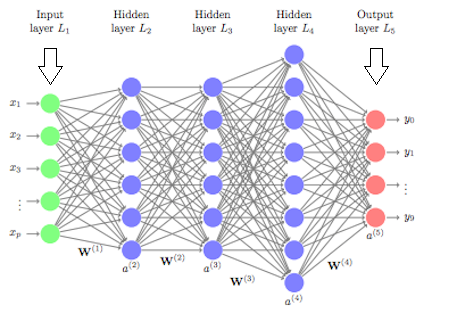

In [1]:
from IPython.display import Image
Image(filename="DeepLearn.png")

# DNN on CIFAR10
In this exercise you are supposed to do a DNN with dense layers. The task is to train a very deep DNN and make predictions on the CIFAR10 dataset. This is a very well known dataset used as a benchmark in computer vision.

* Create a 20 layered NN with 100 neurons
* Use He initialization
* Use ELU activation function
* USe Nadam
* Use early stopping

In [2]:
import tensorflow as tf
from functools import partial
tf.random.set_seed(42)

Download data from keras. Use the cifar 10.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape, x_train[0, :, :].max(), x_train[0, :, :].min()

((50000, 32, 32, 3), 255, 0)

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

# Create model

In [6]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch/s)
    return exponential_decay_fn

In [7]:
def create_dnn(activation='elu', 
               kernel_initializer='he_normal', 
               units=100,
               n_layers=20, 
               batch_normalization=False):
    
    partial_dnn = partial(tf.keras.layers.Dense,
                          activation=activation, 
                          kernel_initializer=kernel_initializer)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
    
    for i in range(n_layers):
        model.add(partial_dnn(units))
        if batch_normalization:
            model.add(tf.keras.layers.BatchNormalization())
            
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Nadam()

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
    

In [8]:
model = create_dnn(batch_normalization=True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

# Train Model

In [10]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=15, 
                    batch_size=128, 
#                     callbacks=callbacks
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 437us/sample - loss: 1.8178 - accuracy: 0.3521 - val_loss: 1.9830 - val_accuracy: 0.3330
Epoch 2/15
50000/50000 [==============================] - 11s 228us/sample - loss: 1.5857 - accuracy: 0.4354 - val_loss: 1.7060 - val_accuracy: 0.4053
Epoch 3/15
50000/50000 [==============================] - 12s 230us/sample - loss: 1.4964 - accuracy: 0.4671 - val_loss: 1.7653 - val_accuracy: 0.3836
Epoch 4/15
50000/50000 [==============================] - 12s 232us/sample - loss: 1.4382 - accuracy: 0.4906 - val_loss: 1.7598 - val_accuracy: 0.4167
Epoch 5/15
50000/50000 [==============================] - 11s 222us/sample - loss: 1.3886 - accuracy: 0.5083 - val_loss: 1.7718 - val_accuracy: 0.3851
Epoch 6/15
50000/50000 [==============================] - 11s 223us/sample - loss: 1.3537 - accuracy: 0.5200 - val_loss: 1.7449 - val_accuracy: 0.3810
Epoch 7/15
50000/50000 [====================

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


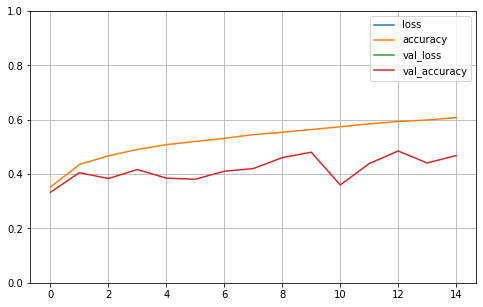

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.gca().set_ylim(0, 1)
plt.show();

### Exercise
Replace batch-normalization with the SELU activation function. Is the performance better?
* Normalize the input
* Use LeCun normal initialization
* Make sure that the DNN contains only a sequence of dense layers